<a href="https://colab.research.google.com/github/TaTsuuYa/data-analysis-project/blob/main/visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Load Data

In [ ]:
df = pd.read_csv('./shows_transformed.csv')
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (4984, 39)


,title,url,img,score,rank,popularity,watching,completed,on_hold,dropped,...,studios_list,producers_list,licensors_list,completion_rate,drop_rate,favorites_rate,type_encoded,status_encoded,rating_encoded,is_airing
0,Sousou no Frieren,https://myanimelist.net/anime/52991/Sousou_no_...,https://cdn.myanimelist.net/images/anime/1015/...,9.291,1,120,223506,816061,25840,17421,...,['Madhouse'],"['Aniplex', 'Dentsu', 'Shogakukan-Shueisha Pro...",['Crunchyroll'],63.58,1.36,6.27,0,0,0,0
1,Chainsaw Man Movie: Reze-hen,https://myanimelist.net/anime/57555/Chainsaw_M...,https://cdn.myanimelist.net/images/anime/1763/...,9.141,2,836,8276,201182,1257,293,...,['MAPPA'],"['None found', 'add some']","['None found', 'add some']",61.79,0.09,2.84,1,0,1,0
2,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,https://cdn.myanimelist.net/images/anime/1208/...,9.101,3,3,281402,2610786,119454,64087,...,['Bones'],"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","['Funimation', 'Aniplex of America']",72.31,1.78,6.61,0,0,1,0
3,Steins;Gate,https://myanimelist.net/anime/9253/Steins_Gate,https://cdn.myanimelist.net/images/anime/1935/...,9.071,4,14,182045,1730415,94228,60909,...,['White Fox'],"['Frontier Works', 'Media Factory', 'Kadokawa ...",['Funimation'],62.67,2.21,7.23,0,0,0,0
4,Shingeki no Kyojin Season 3 Part 2,https://myanimelist.net/anime/38524/Shingeki_n...,https://cdn.myanimelist.net/images/anime/1517/...,9.051,5,21,86877,2286973,10071,8663,...,['Wit Studio'],"['Production I.G', 'Dentsu', 'Mainichi Broadca...",['Funimation'],90.48,0.34,2.47,0,0,1,0


## Dataset Overview

In [ ]:
# Basic statistics
print("Basic Statistics:")
print(df[['score', 'members', 'favorites', 'duration_minutes', 'completion_rate', 'drop_rate']].describe())

Basic Statistics:
             score       members      favorites  duration_minutes  \
count  4984.000000  4.984000e+03    4984.000000       4984.000000   
mean      7.490952  1.835368e+05    2380.194021         35.735353   
std       0.434949  3.613211e+05   10747.859292         29.948380   
min       6.901000  4.320000e+02       0.000000          0.000000   
25%       7.161000  1.520775e+04      32.000000         23.000000   
50%       7.391000  5.528300e+04     163.000000         24.000000   
75%       7.741000  1.819202e+05     886.000000         28.000000   
max       9.291000  4.272273e+06  246363.000000        168.000000   

       completion_rate    drop_rate  
count      4984.000000  4984.000000  
mean         57.413756     3.029414  
std          17.580956     2.463929  
min           0.000000     0.090000  
25%          45.845000     1.050000  
50%          58.355000     2.425000  
75%          70.685000     4.350000  
max          96.710000    20.600000  


## Score Distribution

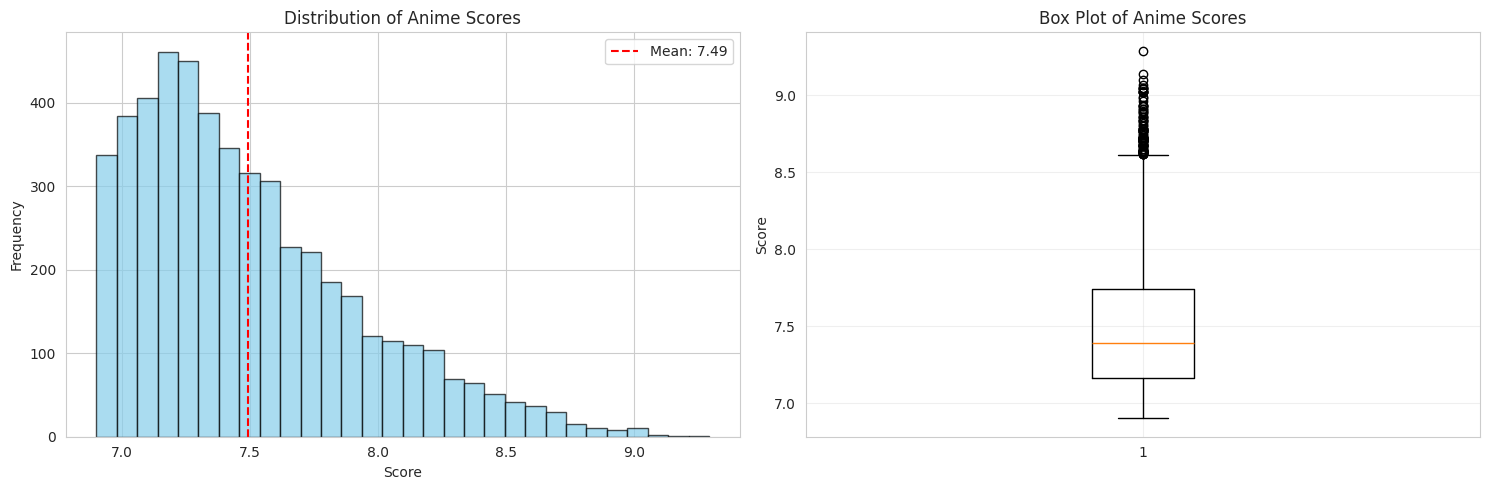

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
ax1.hist(df['score'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Score')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Anime Scores')
ax1.axvline(df['score'].mean(), color='red', linestyle='--', label=f'Mean: {df["score"].mean():.2f}')
ax1.legend()

# Box plot
ax2.boxplot(df['score'], vert=True)
ax2.set_ylabel('Score')
ax2.set_title('Box Plot of Anime Scores')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Top 20 Anime by Score

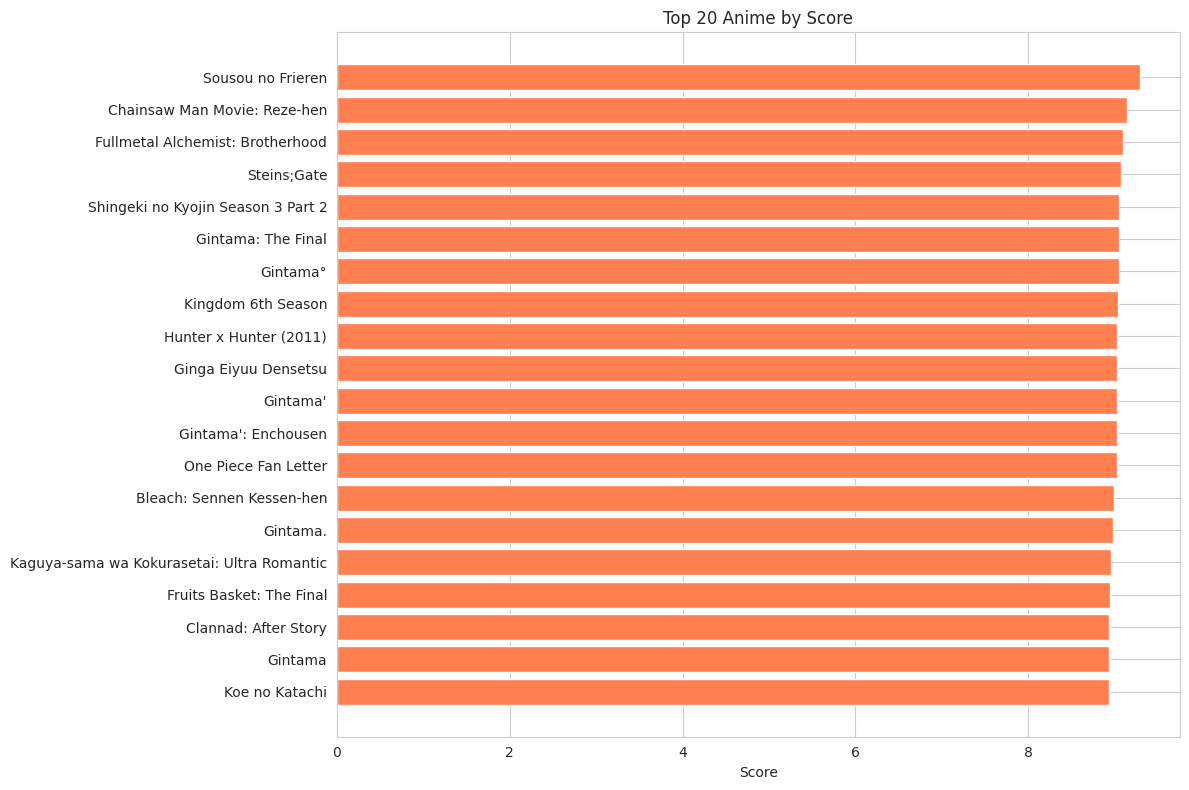

In [ ]:
top_20 = df.nsmallest(20, 'rank')[['title', 'score', 'rank']]

plt.figure(figsize=(12, 8))
plt.barh(range(len(top_20)), top_20['score'], color='coral')
plt.yticks(range(len(top_20)), top_20['title'])
plt.xlabel('Score')
plt.title('Top 20 Anime by Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Popularity Metrics

## Popularity Metrics

## Score vs Popularity Correlation

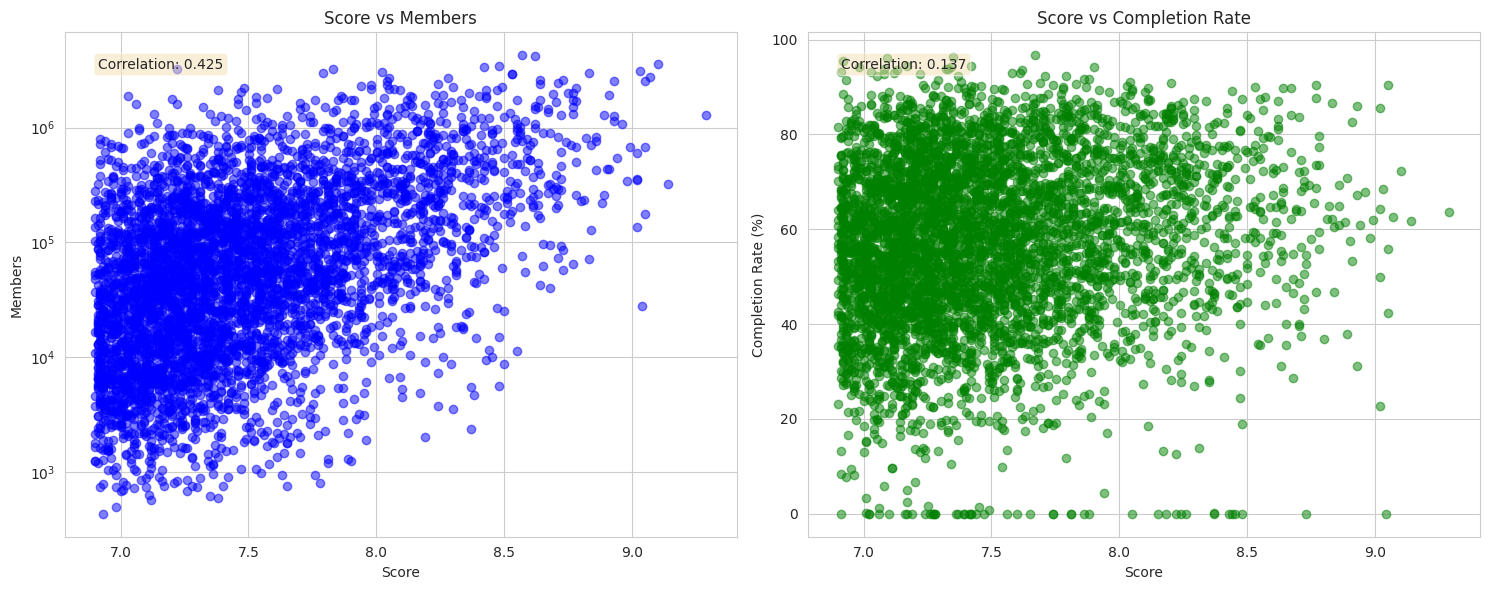

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Score vs Members
ax1.scatter(df['score'], df['members'], alpha=0.5, c='blue')
ax1.set_xlabel('Score')
ax1.set_ylabel('Members')
ax1.set_title('Score vs Members')
ax1.set_yscale('log')

# Add correlation
corr1 = df['score'].corr(df['members'])
ax1.text(0.05, 0.95, f'Correlation: {corr1:.3f}',
         transform=ax1.transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Score vs Completion Rate
ax2.scatter(df['score'], df['completion_rate'], alpha=0.5, c='green')
ax2.set_xlabel('Score')
ax2.set_ylabel('Completion Rate (%)')
ax2.set_title('Score vs Completion Rate')

# Add correlation
corr2 = df['score'].corr(df['completion_rate'])
ax2.text(0.05, 0.95, f'Correlation: {corr2:.3f}',
         transform=ax2.transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

## Anime Types Distribution

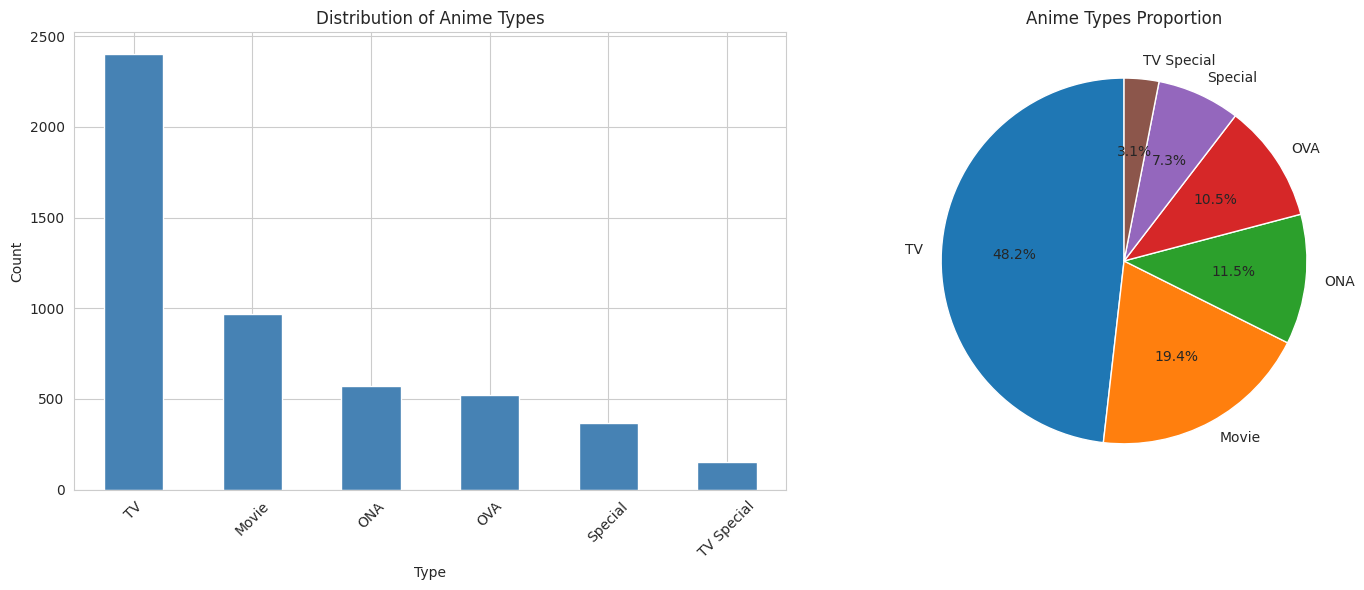

In [ ]:
type_counts = df['type'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart
type_counts.plot(kind='bar', ax=ax1, color='steelblue')
ax1.set_xlabel('Type')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Anime Types')
ax1.tick_params(axis='x', rotation=45)

# Pie chart
ax2.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Anime Types Proportion')

plt.tight_layout()
plt.show()

## Average Score by Type

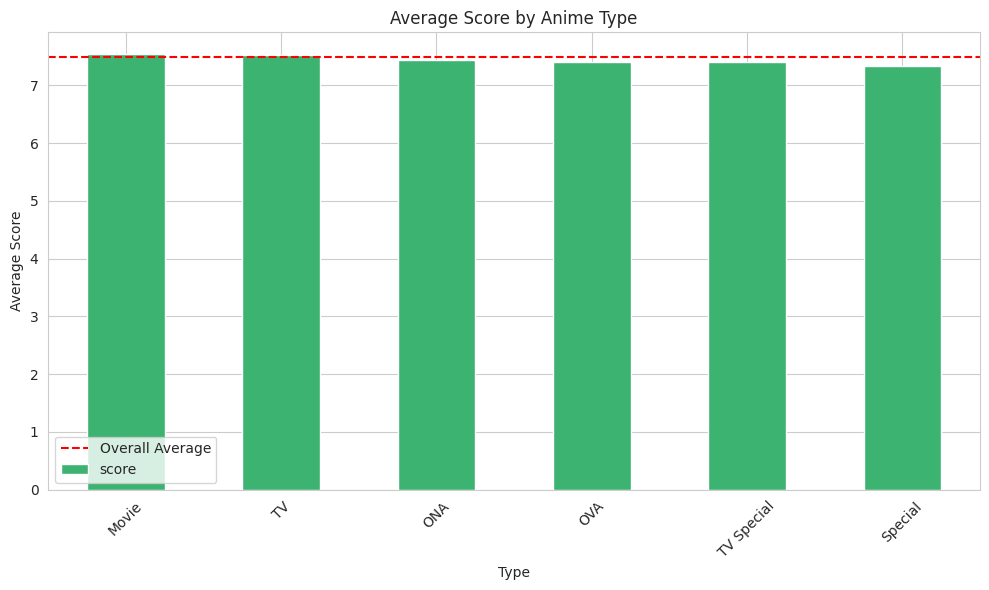

In [ ]:
avg_score_by_type = df.groupby('type')['score'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
avg_score_by_type.plot(kind='bar', color='mediumseagreen')
plt.xlabel('Type')
plt.ylabel('Average Score')
plt.title('Average Score by Anime Type')
plt.xticks(rotation=45)
plt.axhline(y=df['score'].mean(), color='red', linestyle='--', label='Overall Average')
plt.legend()
plt.tight_layout()
plt.show()

## Status Distribution

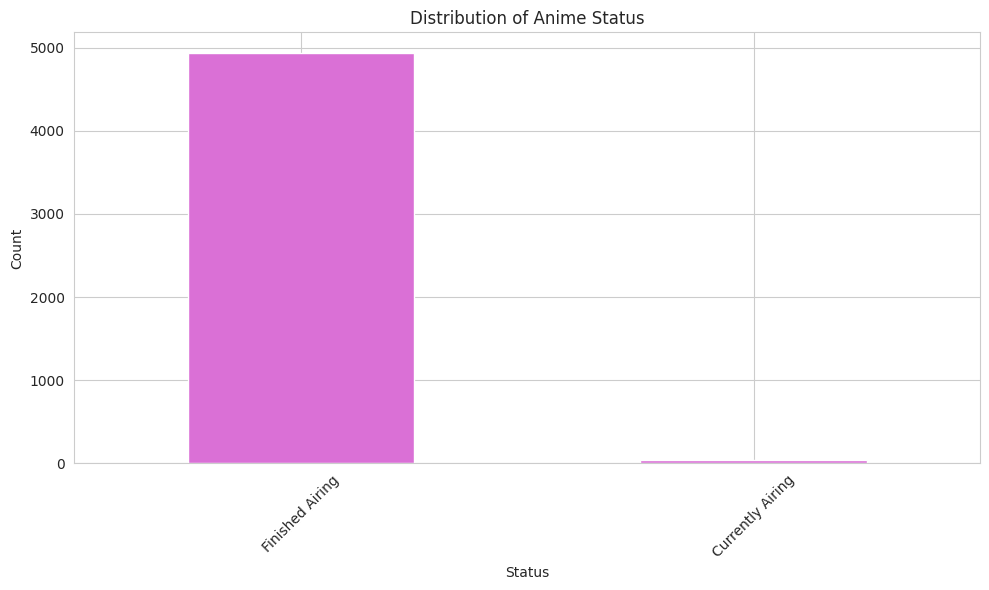

In [ ]:
status_counts = df['status'].value_counts()

plt.figure(figsize=(10, 6))
status_counts.plot(kind='bar', color='orchid')
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Anime Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Duration Analysis

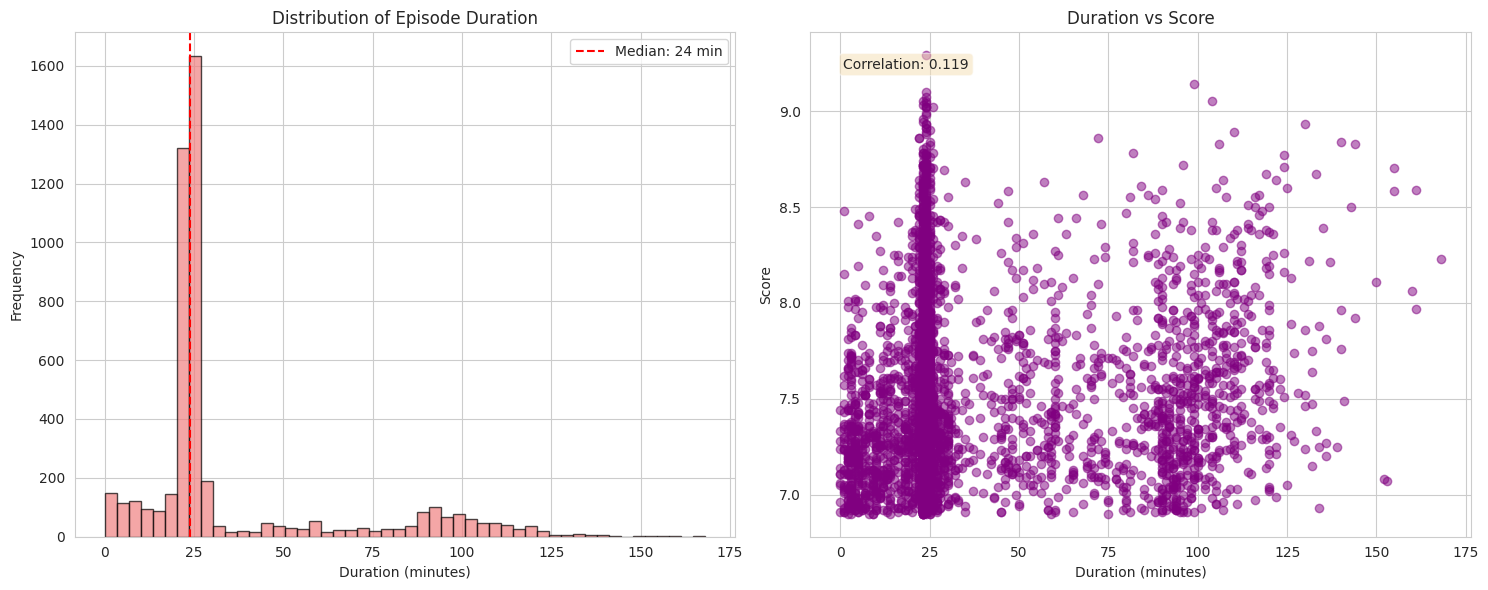

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Duration distribution
axes[0].hist(df['duration_minutes'], bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Duration (minutes)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Episode Duration')
axes[0].axvline(df['duration_minutes'].median(), color='red', linestyle='--',
                label=f'Median: {df["duration_minutes"].median():.0f} min')
axes[0].legend()

# Duration vs Score
axes[1].scatter(df['duration_minutes'], df['score'], alpha=0.5, c='purple')
axes[1].set_xlabel('Duration (minutes)')
axes[1].set_ylabel('Score')
axes[1].set_title('Duration vs Score')

corr = df['duration_minutes'].corr(df['score'])
axes[1].text(0.05, 0.95, f'Correlation: {corr:.3f}',
            transform=axes[1].transAxes, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

## Top Genres Analysis

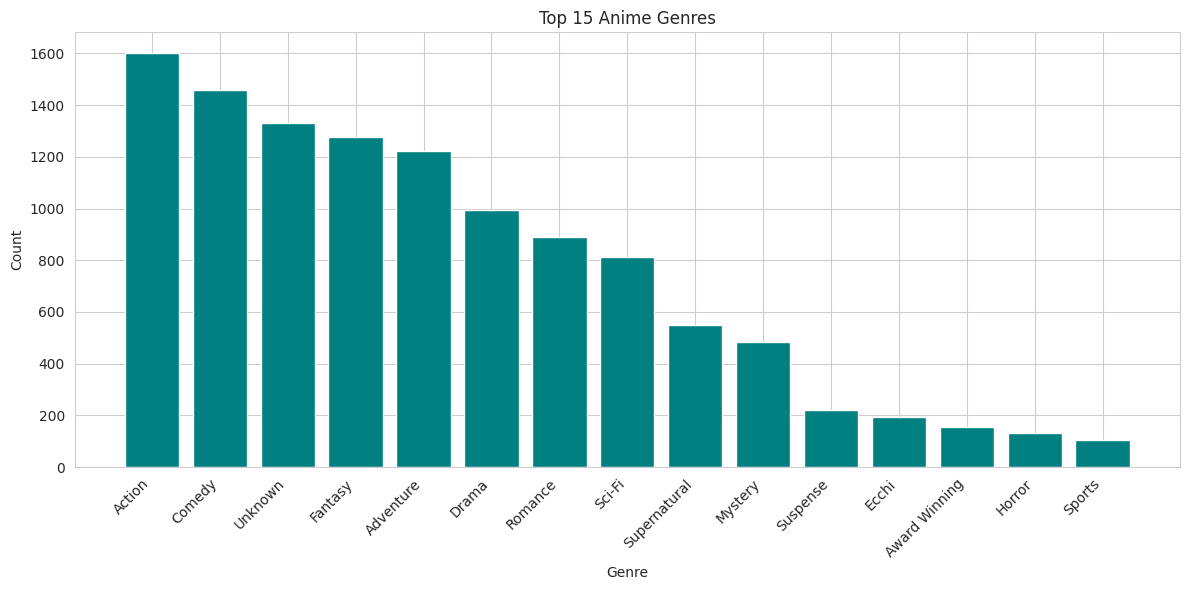


Total unique genres: 20


In [ ]:
# Parse genres_list from string representation
import ast

# Get all genres
all_genres = []
for genres_str in df['genres_list'].dropna():
    try:
        genres = ast.literal_eval(genres_str)
        all_genres.extend(genres)
    except:
        pass

genre_counts = Counter(all_genres)
top_genres = dict(genre_counts.most_common(15))

plt.figure(figsize=(12, 6))
plt.bar(top_genres.keys(), top_genres.values(), color='teal')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 15 Anime Genres')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"\nTotal unique genres: {len(genre_counts)}")

## Top Studios Analysis

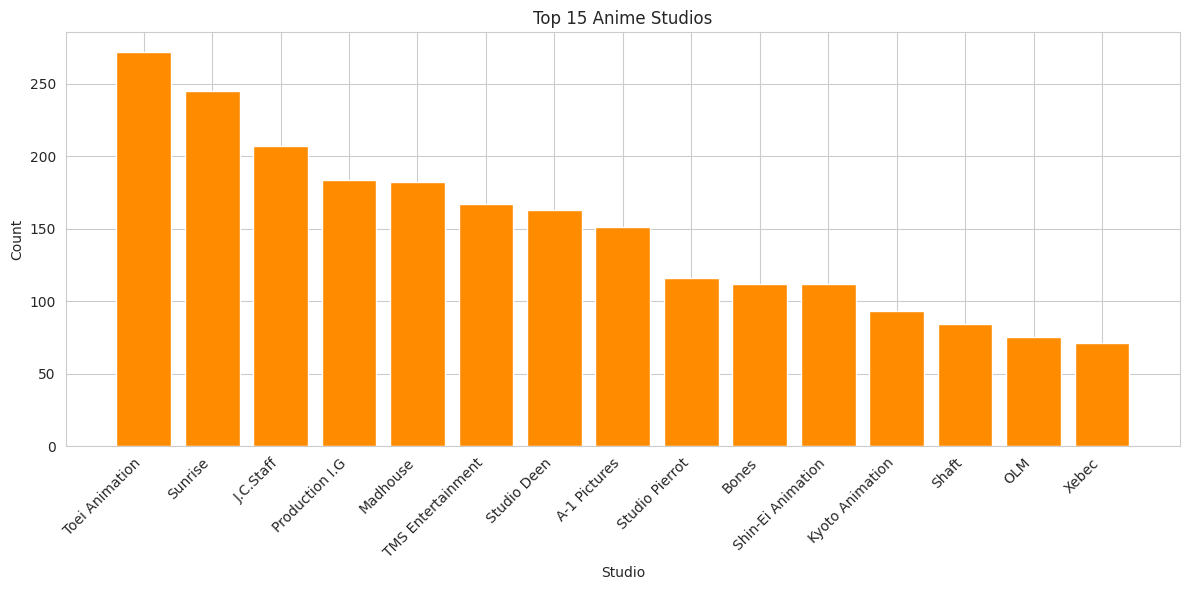


Total unique studios: 452


In [ ]:
# Get all studios
all_studios = []
for studios_str in df['studios_list'].dropna():
    try:
        studios = ast.literal_eval(studios_str)
        all_studios.extend(studios)
    except:
        pass

studio_counts = Counter(all_studios)
top_studios = dict(studio_counts.most_common(15))

plt.figure(figsize=(12, 6))
plt.bar(top_studios.keys(), top_studios.values(), color='darkorange')
plt.xlabel('Studio')
plt.ylabel('Count')
plt.title('Top 15 Anime Studios')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"\nTotal unique studios: {len(studio_counts)}")

## Rating Distribution

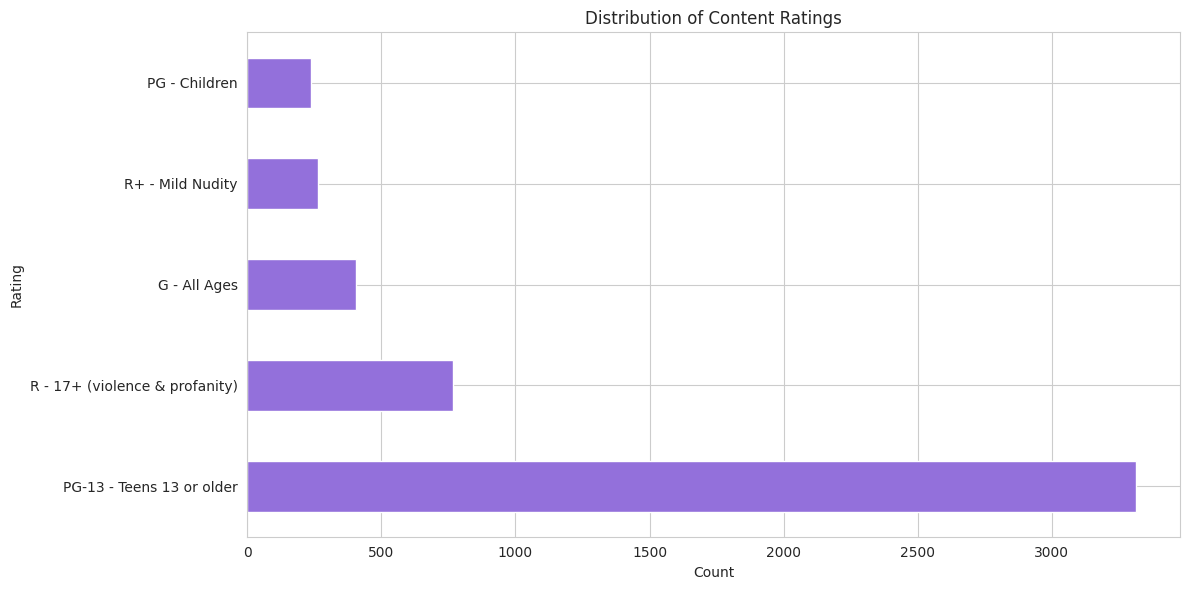

In [ ]:
rating_counts = df['rating'].value_counts()

plt.figure(figsize=(12, 6))
rating_counts.plot(kind='barh', color='mediumpurple')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.title('Distribution of Content Ratings')
plt.tight_layout()
plt.show()

## Completion Rate vs Drop Rate

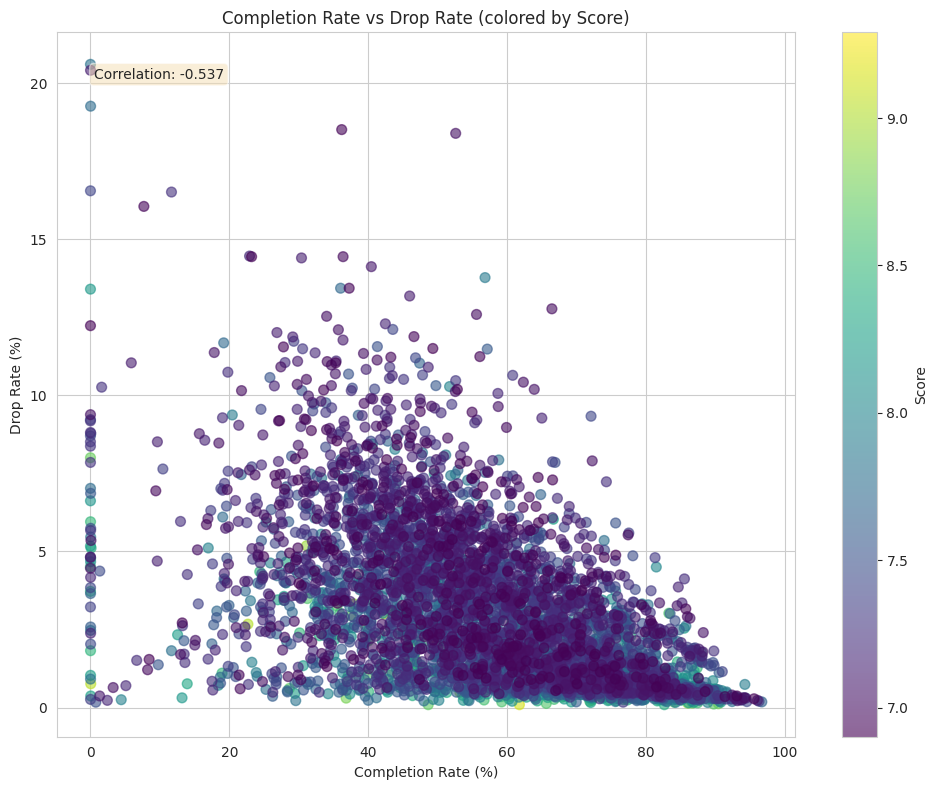

In [ ]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['completion_rate'], df['drop_rate'],
                     c=df['score'], cmap='viridis', alpha=0.6, s=50)
plt.xlabel('Completion Rate (%)')
plt.ylabel('Drop Rate (%)')
plt.title('Completion Rate vs Drop Rate (colored by Score)')
plt.colorbar(scatter, label='Score')

# Add correlation
corr = df['completion_rate'].corr(df['drop_rate'])
plt.text(0.05, 0.95, f'Correlation: {corr:.3f}',
         transform=plt.gca().transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

## Favorites Rate Analysis

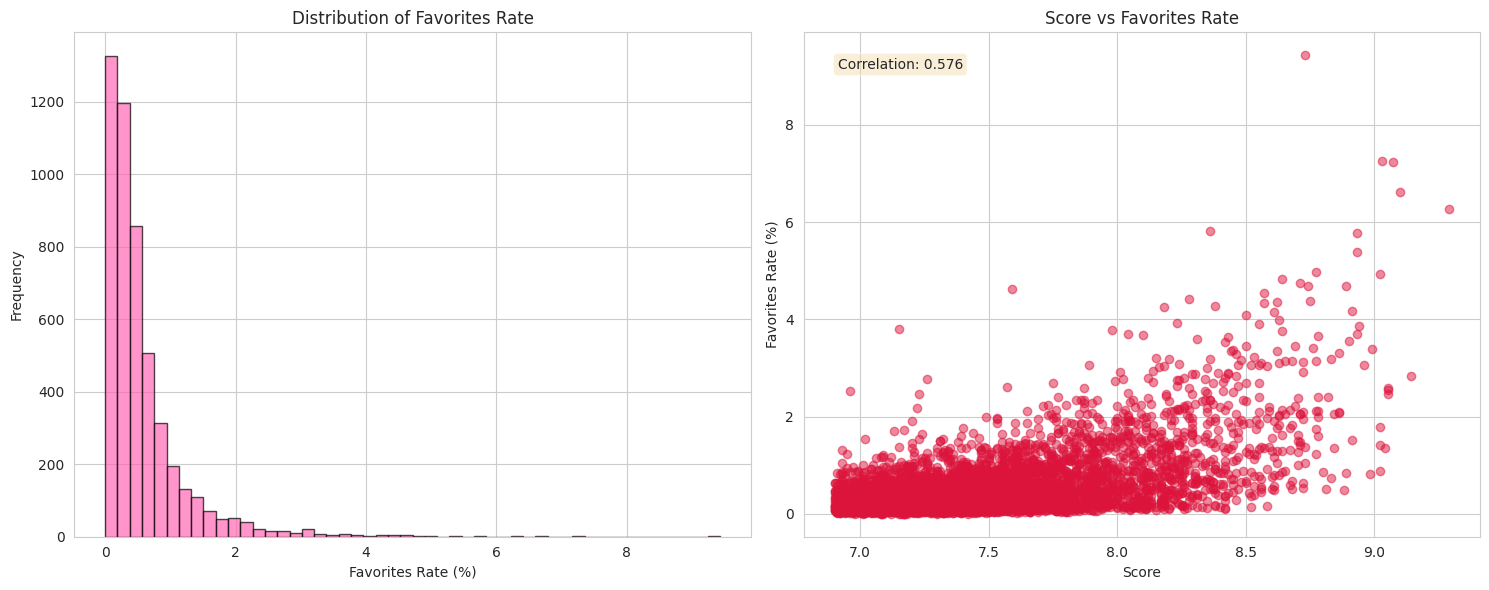

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Favorites rate distribution
axes[0].hist(df['favorites_rate'], bins=50, color='hotpink', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Favorites Rate (%)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Favorites Rate')

# Favorites rate vs Score
axes[1].scatter(df['score'], df['favorites_rate'], alpha=0.5, c='crimson')
axes[1].set_xlabel('Score')
axes[1].set_ylabel('Favorites Rate (%)')
axes[1].set_title('Score vs Favorites Rate')

corr = df['score'].corr(df['favorites_rate'])
axes[1].text(0.05, 0.95, f'Correlation: {corr:.3f}',
            transform=axes[1].transAxes, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

## Currently Airing vs Finished

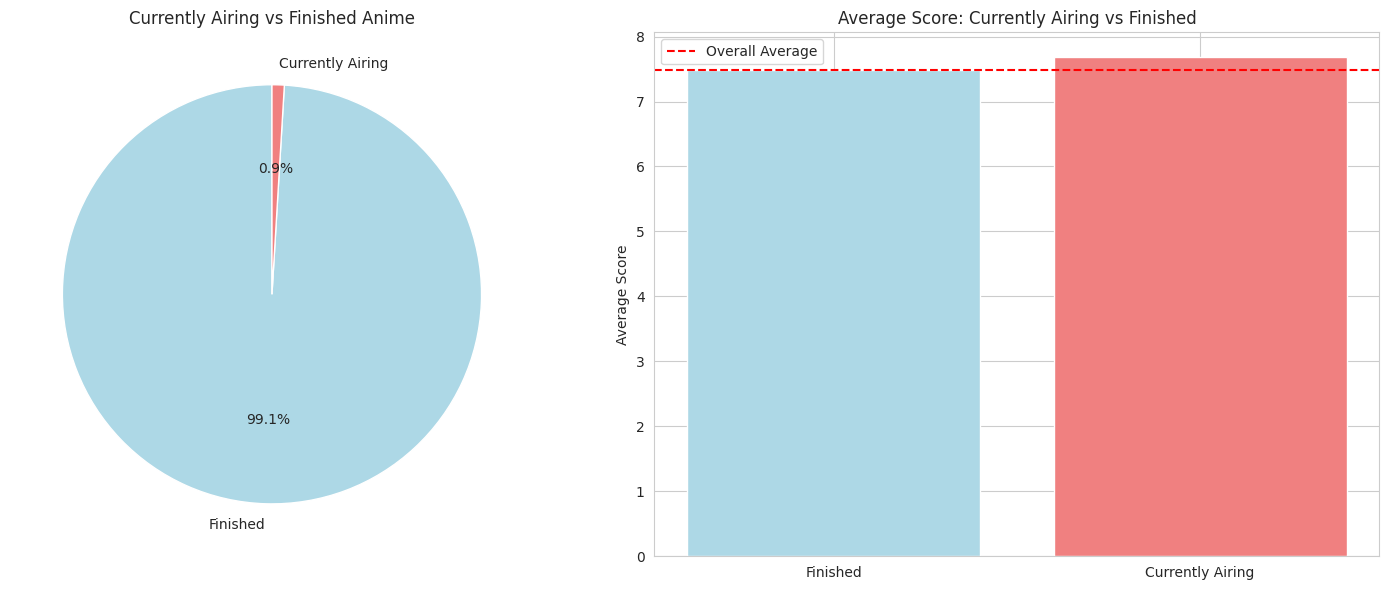

In [ ]:
airing_counts = df['is_airing'].value_counts()
labels = ['Finished', 'Currently Airing']

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart
axes[0].pie(airing_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
axes[0].set_title('Currently Airing vs Finished Anime')

# Average score comparison
avg_scores = df.groupby('is_airing')['score'].mean()
axes[1].bar(labels, avg_scores, color=['lightblue', 'lightcoral'])
axes[1].set_ylabel('Average Score')
axes[1].set_title('Average Score: Currently Airing vs Finished')
axes[1].axhline(y=df['score'].mean(), color='red', linestyle='--', label='Overall Average')
axes[1].legend()

plt.tight_layout()
plt.show()

## Correlation Heatmap

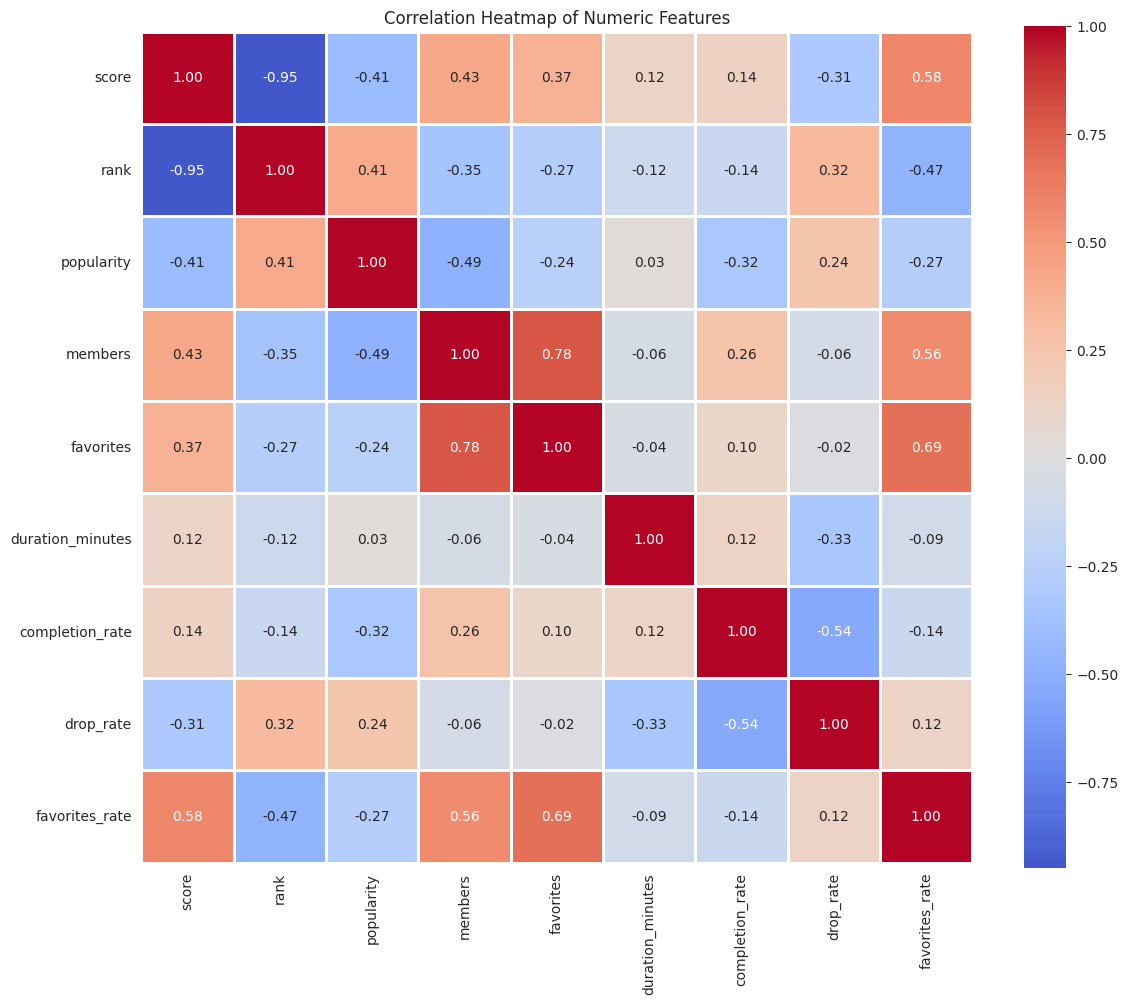

In [ ]:
# Select numeric columns for correlation
numeric_cols = ['score', 'rank', 'popularity', 'members', 'favorites',
                'duration_minutes', 'completion_rate', 'drop_rate', 'favorites_rate']

correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

## Key Insights Summary

In [ ]:
print("=" * 60)
print("KEY INSIGHTS FROM THE DATASET")
print("=" * 60)
print(f"\n1. Dataset Size: {len(df)} anime entries")
print(f"\n2. Score Statistics:")
print(f"   - Average Score: {df['score'].mean():.2f}")
print(f"   - Highest Score: {df['score'].max():.2f} ({df.loc[df['score'].idxmax(), 'title']})")
print(f"   - Lowest Score: {df['score'].min():.2f}")
print(f"\n3. Popularity:")
print(f"   - Most Members: {df['members'].max():,} ({df.loc[df['members'].idxmax(), 'title']})")
print(f"   - Most Favorites: {df['favorites'].max():,} ({df.loc[df['favorites'].idxmax(), 'title']})")
print(f"\n4. Engagement Metrics:")
print(f"   - Average Completion Rate: {df['completion_rate'].mean():.2f}%")
print(f"   - Average Drop Rate: {df['drop_rate'].mean():.2f}%")
print(f"   - Average Favorites Rate: {df['favorites_rate'].mean():.2f}%")
print(f"\n5. Content Types:")
for type_name, count in df['type'].value_counts().items():
    print(f"   - {type_name}: {count} ({count/len(df)*100:.1f}%)")
print(f"\n6. Duration:")
print(f"   - Average Duration: {df['duration_minutes'].mean():.0f} minutes")
print(f"   - Median Duration: {df['duration_minutes'].median():.0f} minutes")
print("=" * 60)

KEY INSIGHTS FROM THE DATASET

1. Dataset Size: 4984 anime entries

2. Score Statistics:
   - Average Score: 7.49
   - Highest Score: 9.29 (Sousou no Frieren)
   - Lowest Score: 6.90

3. Popularity:
   - Most Members: 4,272,273 (Shingeki no Kyojin)
   - Most Favorites: 246,363 (One Piece)

4. Engagement Metrics:
   - Average Completion Rate: 57.41%
   - Average Drop Rate: 3.03%
   - Average Favorites Rate: 0.56%

5. Content Types:
   - TV: 2402 (48.2%)
   - Movie: 968 (19.4%)
   - ONA: 573 (11.5%)
   - OVA: 522 (10.5%)
   - Special: 366 (7.3%)
   - TV Special: 153 (3.1%)

6. Duration:
   - Average Duration: 36 minutes
   - Median Duration: 24 minutes
